## Introduction
This work intends to provide examples of use based on the [GoTriple platform](https://www.gotriple.eu/), which provides a single access point to discover and reuse open scholarly Social Sciences and Humanities (SSH) resources and find peers.

### First of all, we include Python libraries

In [25]:
from  collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
import glob

### The next step is to implement three functions to compute the richness, diversity and the rate

In [19]:
def richness(items):
    """
    Parameters
    ----------
    items : iterable 
        a collection of repeatable elements.

    Returns
    -------
    int
        the number of unique items in the collectin.

    """
    return len(set(items))


In [20]:
def shannon_diversty_index(items):
    """
    Parameters
    ----------
    items : iterable
        a collection of repeatable elements.

    Returns
    -------
    float
        Shannon diversity index for the iterable collection.

    """
    frequencies = Counter(items).values()
    total = sum(frequencies)
    entropy = log(total, 2) - sum(f * log(f, 2) for f in frequencies) / total 

    return 2 ** entropy

In [21]:
def dr_rate(items):
    """
    Parameters
    ----------
    items : iterable
         a collection of repeatable elements.

    Returns
    -------
    float
        ratio between Shannon diversity and richness of the collection.

    """
    return shannon_diversty_index(items) / richness(items)

### We define a function to plot the diversity

In [22]:
def plot_subject_diversity(host, df, column_name, years, r_scale=1):
    """
    Create cummulative plot for the specified data, range of years 
    Parameters
    ----------
    host : str
        Host institution short name, to be used in the plot title.
    df : DataFrame
        DataFrame with columns YEAR and column_name.
    years : iterable collection of int
        The years to be used as X-points for the plot
    r_scale : int, optional
        Scale for the reduction of richness. The default is 1.
    """
    plt.clf()
    X = np.array(years)
    R = list()  # richness
    D = list()  # diversity
    for year in X:
        print(year)
        values = df[df.year <= year][column_name]
        if len(values) != 0:
            R.append(richness(values) / r_scale)
            D.append(shannon_diversty_index(values))
        else: 
            X = np.delete(X, np.where(X==year)[0][0])
    if r_scale == 1:
        plt.plot(X, R, 's', label='richness')
    else: 
        plt.plot(X, R, 's', label=f'richness / {r_scale}')
    plt.plot(X, D, 'o', label='diversity')
    
    plt.legend(loc='upper left')
    plt.grid()
    xticks = [x for x in range(min(X), max(X) + 1) if x % 5 == 0]
    plt.xticks(xticks, xticks)
    _, yhigh = plt.ylim()
    plt.ylim(0, 1.1 * yhigh)
    name =  column_name.lower().replace('_', ' ')
    plt.title(f'Diversity of {name} ({host})')
    plt.savefig(f'plots/{column_name}_{host}.png', dpi=300)

### We define a function to extract the data we want to employ from the JSON

* Note that we need to unzip the file included in the folder input

In [23]:
def extract_data(path, create_log):

    json_files = glob.glob(path + "/*.json")
    print(json_files)
    
    df = pd.DataFrame()
    for file_path in json_files:
        print(file_path)
        df_file = pd.read_json(file_path) #'input/gotriple_response_11.json'
        df = pd.concat([df,df_file])

    df["year"] = df['date_published'].str.extract('(\d{4})', expand=True) 
    df["year"] = pd.to_numeric(df["year"])

    df = df[(df.year!='')&(df.in_language.str.len() > 1)]
    df = df.explode('in_language')

    df = df[(df.in_language.str.len() > 1)]
    
    if create_log:
        df_keywords = df['in_language']
        df_keywords.to_csv('languages.csv', index=False)
    
    return df

### Finally, we define the parameters to read the data and obtain the results

Note that is required to extract the json file

In [31]:
#import zipfile

#with zipfile.ZipFile('data/gotriple_response_8.zip') as myzip:
#    myzip.extractall()
#    print("Extracted files:")
#    for file in myzip.namelist():
#        print(file)

Extracted files:
gotriple_response_8.json


['input/fasca/gotriple_response_8.json']
input/fasca/gotriple_response_8.json
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
DR_RATE= 0.34907496354291306


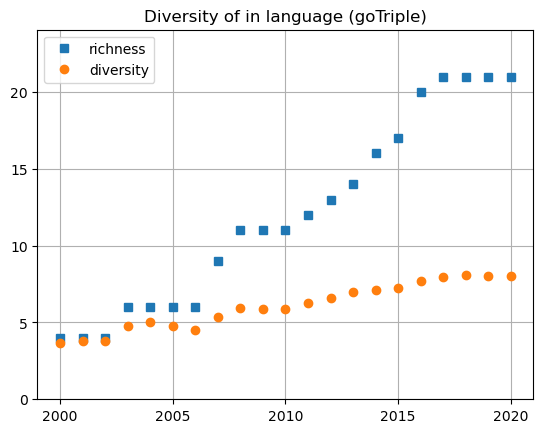

In [26]:
host="goTriple"
scale=1
first=1998
last=2020
create_log = True
path = 'data'

df = extract_data(path, create_log)
plot_subject_diversity(host,  
                        df, 
                        'in_language', 
                        range(first, last + 1),  
                        scale)

print('DR_RATE=', dr_rate(df.in_language))